In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100

In [2]:
train = pd.read_csv("D:\\cs-training.csv")
kaggle_test = pd.read_csv("D:\\cs-test.csv")

In [3]:
train.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766126609,45,2,0.802982129,9120.0,13,0,6,0,2.0
1,2,0,0.957151019,40,0,0.121876201,2600.0,4,0,0,0,1.0
2,3,0,0.65818014,38,1,0.085113375,3042.0,2,1,0,0,0.0
3,4,0,0.233809776,30,0,0.036049682,3300.0,5,0,0,0,0.0
4,5,0,0.9072394,49,1,0.024925695,63588.0,7,0,1,0,0.0


In [4]:
train.shape

(150000, 12)

In [5]:
train.describe()

,Id,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,52.295207,0.421033,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,14.771866,4.192781,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,52.000000,0.000000,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,63.000000,0.000000,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,109.000000,98.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  object 
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  object 
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
train.isnull().sum()

Id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
kaggle_test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

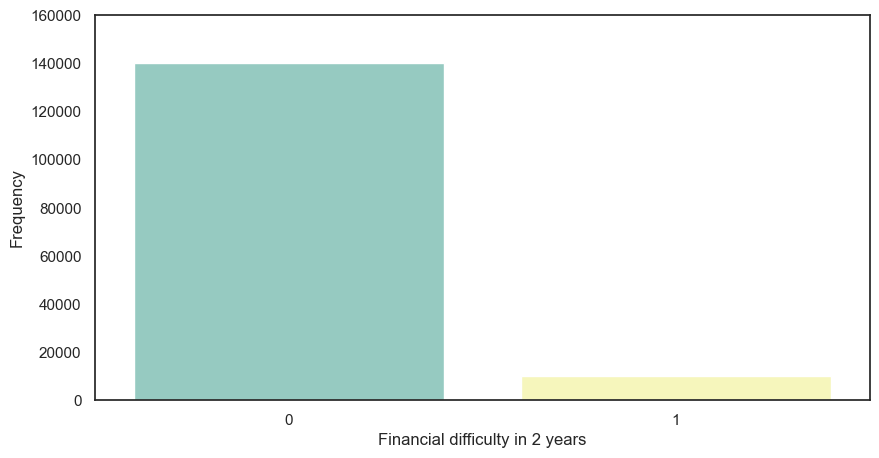

In [9]:
ax = sns.countplot(x = train.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Financial difficulty in 2 years')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

In [10]:
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set non-convertible values to NaN

# Example columns that should be numeric
numeric_columns = ["RevolvingUtilizationOfUnsecuredLines",
                    "age",
                    "NumberOfTime30-59DaysPastDueNotWorse",
                    "DebtRatio",
                    "MonthlyIncome",
                    "NumberOfOpenCreditLinesAndLoans",
                    "NumberOfTimes90DaysLate",
                    "NumberRealEstateLoansOrLines",
                    "NumberOfTime60-89DaysPastDueNotWorse",
                    "NumberOfDependents"]

convert_to_numeric(train, numeric_columns)

In [11]:
# Fill NaN values with the mean or median of the column
train.fillna(train.mean(), inplace=True)
# or drop rows with NaN values
# train.dropna(inplace=True)


In [12]:
def detect_outliers(df, n, features):
    outliers = pd.DataFrame()
    
    for col in features:
        # Ensure column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            # 1st quartile (25%)
            Q1 = np.percentile(df[col].dropna(), 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(df[col].dropna(), 75)
            IQR = Q3 - Q1
            
            # Determine outliers
            outlier_condition = (df[col] < (Q1 - n * IQR)) | (df[col] > (Q3 + n * IQR))
            outliers = pd.concat([outliers, df[outlier_condition]])
        else:
            print(f"Column {col} is not numeric. Skipping...")
    
    return outliers

# Detect outliers
Outliers_to_drop = detect_outliers(train, 2, numeric_columns)
print(Outliers_to_drop)


            Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
162        163                 1                              6.147304   47   
191        192                 0                              6.147304   53   
226        227                 1                              6.147304   38   
251        252                 1                              6.147304   58   
293        294                 0                           2340.000000   45   
...        ...               ...                                   ...  ...   
149893  149894                 0                              0.000000   41   
149899  149900                 0                              0.235331   46   
149928  149929                 0                              0.342069   45   
149968  149969                 1                              0.983825   55   
149981  149982                 0                              0.810012   43   

        NumberOfTime30-59DaysPastDueNotWorse   Debt

In [13]:
def detect_outliers(df, n, features):
    outlier_indices = pd.DataFrame()
    
    for col in features:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = np.percentile(df[col].dropna(), 25)
            Q3 = np.percentile(df[col].dropna(), 75)
            IQR = Q3 - Q1
            
            outlier_condition = (df[col] < (Q1 - n * IQR)) | (df[col] > (Q3 + n * IQR))
            outlier_indices = pd.concat([outlier_indices, df[outlier_condition].index.to_series()])
        else:
            print(f"Column {col} is not numeric. Skipping...")
    
    # Remove duplicate indices
    outlier_indices = outlier_indices.drop_duplicates().astype(int)
    return outlier_indices

# Detect outlier indices
Outliers_indices = detect_outliers(train, 2, numeric_columns)
print("Outlier indices:", Outliers_indices)


Outlier indices:              0
162        162
191        191
226        226
251        251
293        293
...        ...
149876  149876
149884  149884
149899  149899
149928  149928
149981  149981

[68131 rows x 1 columns]


In [14]:
# Drop rows with outlier indices
train_cleaned = train.drop(Outliers_indices, axis=0)
print(train_cleaned.shape)


(149999, 12)


In [15]:
def detect_outliers(df, n, features):
    outlier_indices = pd.Series(dtype=int)
    
    for col in features:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = np.percentile(df[col].dropna(), 25)
            Q3 = np.percentile(df[col].dropna(), 75)
            IQR = Q3 - Q1
            
            outlier_condition = (df[col] < (Q1 - n * IQR)) | (df[col] > (Q3 + n * IQR))
            outlier_indices = pd.concat([outlier_indices, df[outlier_condition].index.to_series()])
        else:
            print(f"Column {col} is not numeric. Skipping...")
    
    # Remove duplicate indices
    outlier_indices = outlier_indices.drop_duplicates().astype(int)
    return outlier_indices

# Example usage
numeric_columns = ["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse",
                   "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate",
                   "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]

Outliers_to_drop = detect_outliers(train, 2, numeric_columns)


In [16]:
# Drop outlier rows
train_cleaned = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
print(train_cleaned.shape)


(81869, 12)


In [17]:
train_len = len(train)
dataset =  pd.concat(objs=[train, kaggle_test], axis=0).reset_index(drop=True)

In [18]:
dataset.shape

(251503, 13)

In [19]:
dataset = dataset.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

train = train.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

kaggle_test = kaggle_test.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

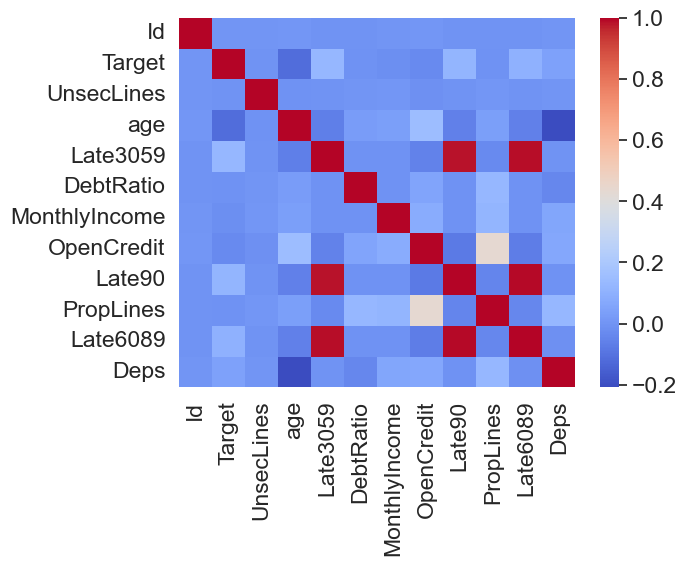

In [20]:
# Correlation matrix
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

In [21]:
dataset.UnsecLines.describe()

count    251503.000000
mean          5.809380
std         229.632855
min           0.000000
25%           0.029977
50%           0.153578
75%           0.561374
max       50708.000000
Name: UnsecLines, dtype: float64

In [22]:
dataset.UnsecLines = pd.qcut(dataset.UnsecLines.values, 5).codes

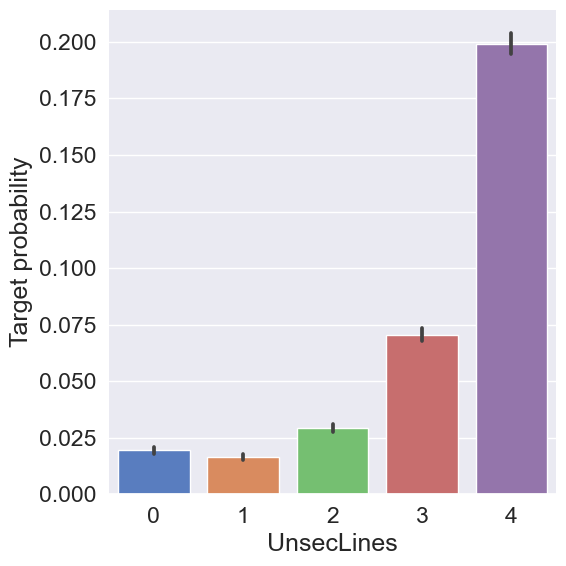

In [23]:
# Assuming dataset is your DataFrame and it contains the 'UnsecLines' and 'Target' columns
g = sns.catplot(x="UnsecLines", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

plt.show()

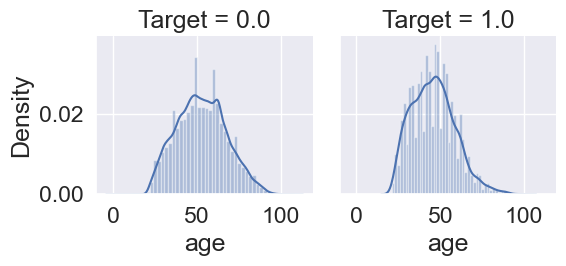

In [24]:
# Explore Age vs Survived
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "age")

In [25]:
dataset.age = pd.qcut(dataset.age.values, 5).codes

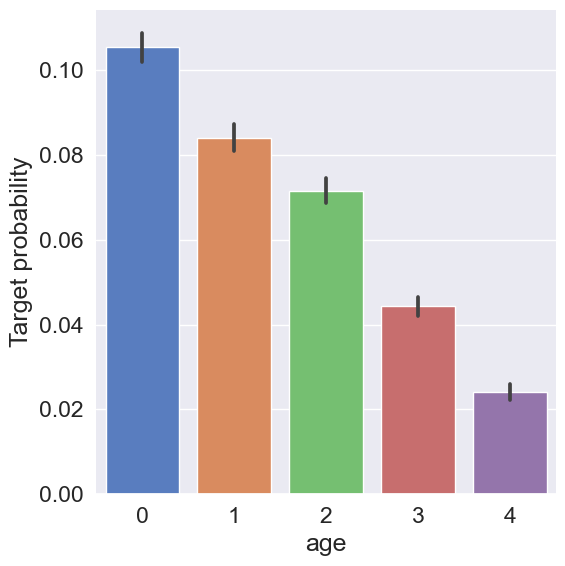

In [26]:
# Ensure you have a DataFrame named 'dataset' and columns 'age' and 'Target'
g = sns.catplot(x="age", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

plt.show()

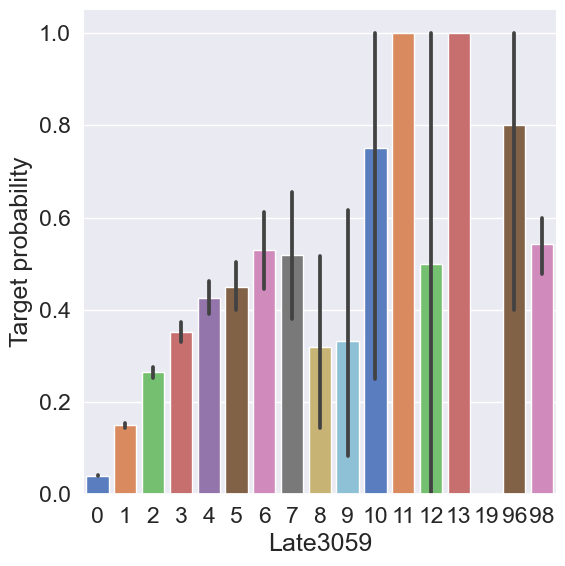

In [27]:
# Ensure you have a DataFrame named 'dataset' and columns 'Late3059' and 'Target'
g = sns.catplot(x="Late3059", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

plt.show()

In [28]:
for i in range(len(dataset)):
    if dataset.Late3059[i] >= 6:
        dataset.Late3059[i] = 6

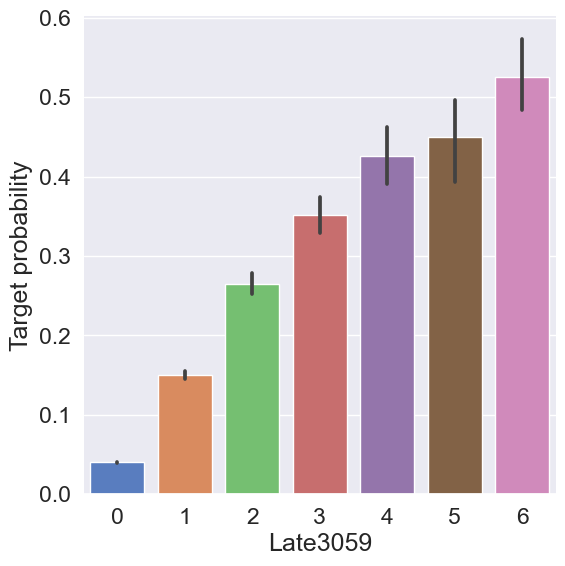

In [29]:
# Ensure you have a DataFrame named 'dataset' and columns 'Late3059' and 'Target'
g = sns.catplot(
    x="Late3059", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Height of the plot (previously 'size' in factorplot)
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

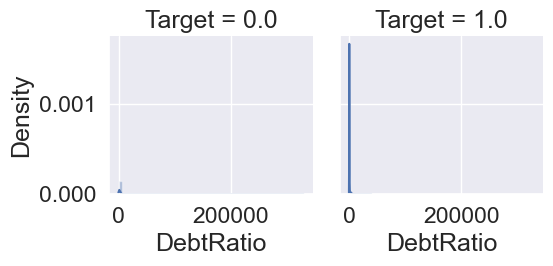

In [30]:
# Explore Age vs Survived
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "DebtRatio")

In [31]:
dataset.DebtRatio = pd.qcut(dataset.DebtRatio.values, 5).codes

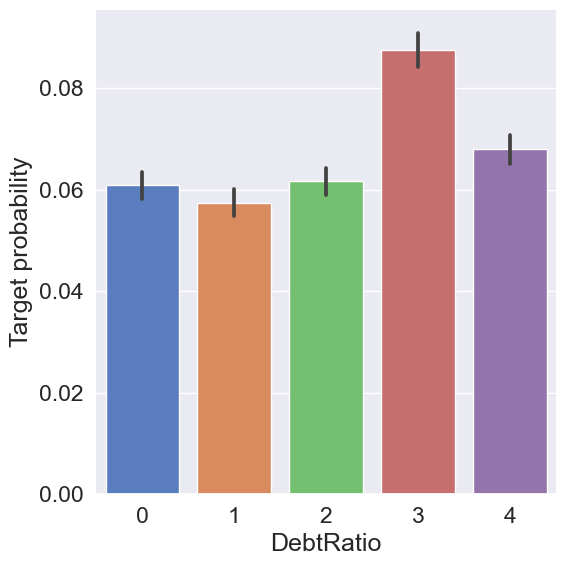

In [32]:
# Ensure you have a DataFrame named 'dataset' and columns 'DebtRatio' and 'Target'
g = sns.catplot(
    x="DebtRatio", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Height of the plot (replaces 'size' in factorplot)
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [33]:
dataset.MonthlyIncome.isnull().sum()

20103

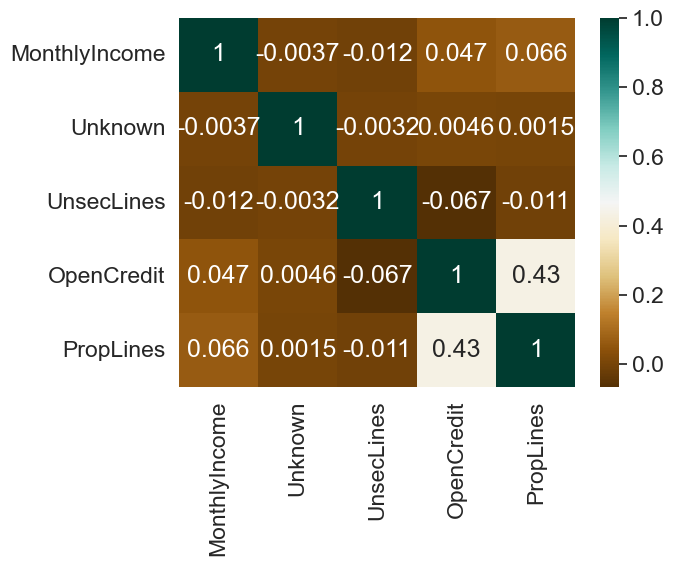

In [34]:
g = sns.heatmap(dataset[["MonthlyIncome","Unknown","UnsecLines","OpenCredit","PropLines"]].corr(),cmap="BrBG",annot=True)

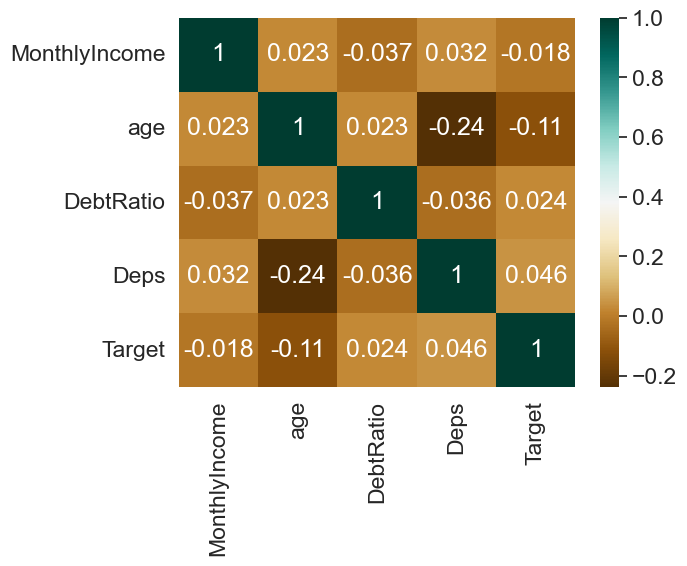

In [35]:
g = sns.heatmap(dataset[["MonthlyIncome","age","DebtRatio","Deps","Target"]].corr(),cmap="BrBG",annot=True)

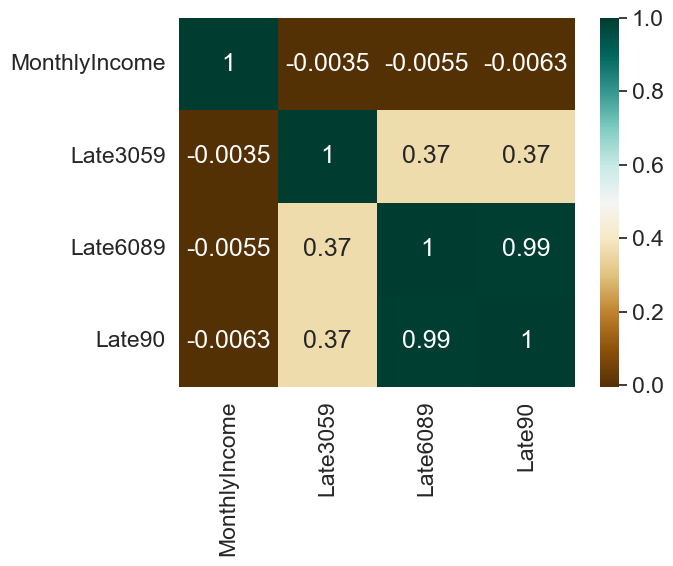

In [36]:
g = sns.heatmap(dataset[["MonthlyIncome","Late3059","Late6089","Late90"]].corr(),cmap="BrBG",annot=True)

In [37]:
dataset.MonthlyIncome.median()

6000.0

In [38]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

In [39]:
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values, 5).codes

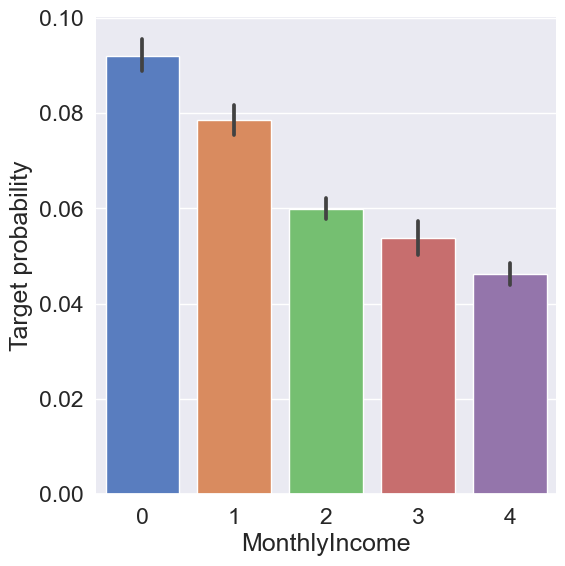

In [40]:
# Ensure you have a DataFrame named 'dataset' and columns 'MonthlyIncome' and 'Target'
g = sns.catplot(
    x="MonthlyIncome", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Height of the plot (replaces 'size' in factorplot)
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [41]:
dataset.OpenCredit.describe()

count    251503.000000
mean          8.453064
std           5.145194
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          85.000000
Name: OpenCredit, dtype: float64

In [42]:
dataset.OpenCredit = pd.qcut(dataset.OpenCredit.values, 5).codes

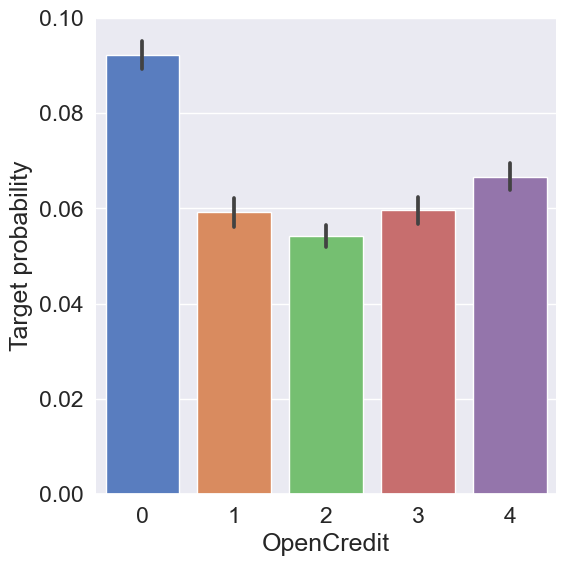

In [43]:
# Ensure you have a DataFrame named 'dataset' and columns 'OpenCredit' and 'Target'
g = sns.catplot(
    x="OpenCredit", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Height of the plot (replaces 'size' in factorplot)
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [44]:
dataset.Late90.describe()

count    251503.000000
mean          0.278370
std           4.312539
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Late90, dtype: float64

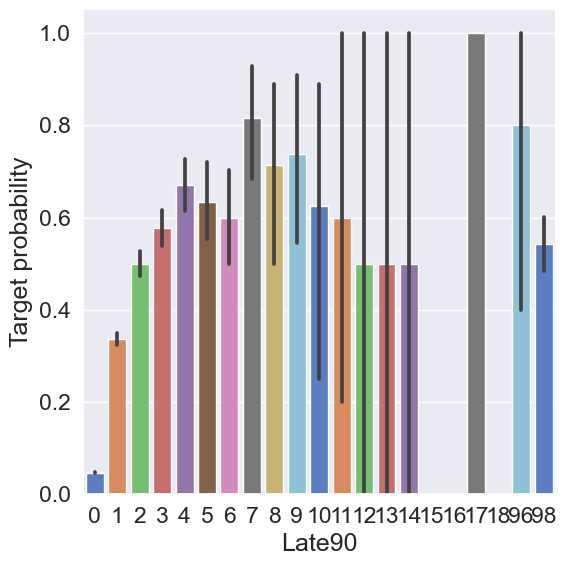

In [45]:
# Ensure you have a DataFrame named 'dataset' and columns 'Late90' and 'Target'
g = sns.catplot(
    x="Late90", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Height of the plot (replaces 'size' in factorplot)
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [46]:
for i in range(len(dataset)):
    if dataset.Late90[i] >= 5:
        dataset.Late90[i] = 5

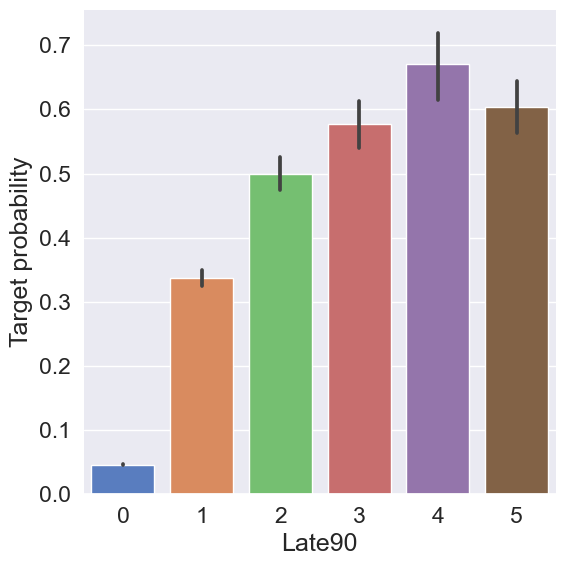

In [47]:
# Create the bar plot
g = sns.catplot(
    x="Late90", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Replaces 'size' parameter in factorplot
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [48]:
dataset.PropLines.describe()

count    251503.000000
mean          1.016155
std           1.121935
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: PropLines, dtype: float64

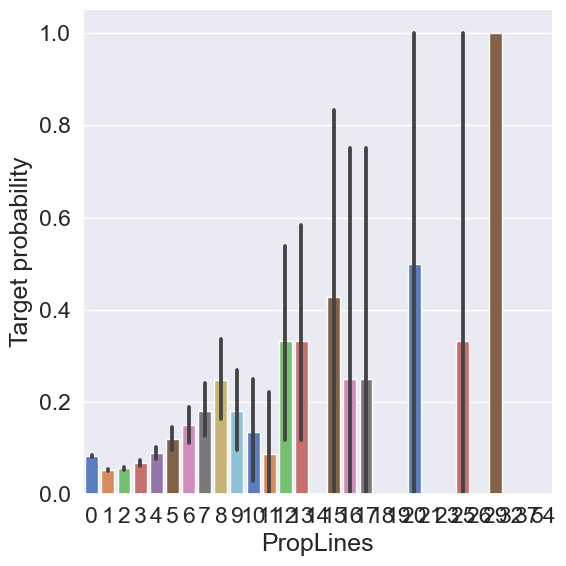

In [49]:
# Create the bar plot
g = sns.catplot(
    x="PropLines", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Replaces 'size' parameter in factorplot
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [50]:
for i in range(len(dataset)):
    if dataset.PropLines[i] >= 6:
        dataset.PropLines[i] = 6

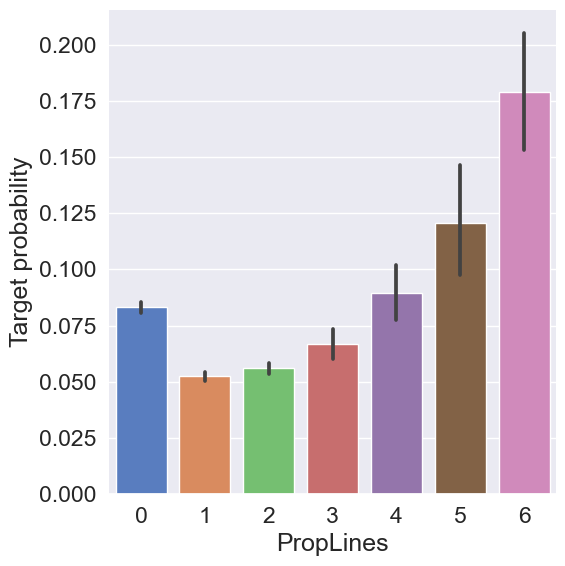

In [51]:
# Create the bar plot
g = sns.catplot(
    x="PropLines", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Replaces 'size' parameter in factorplot
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

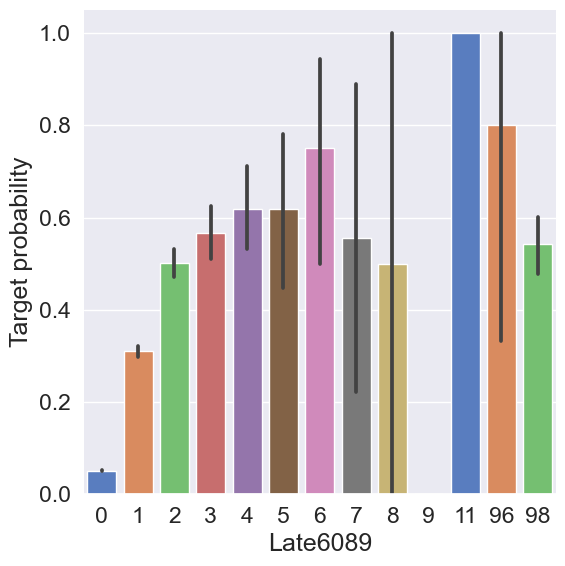

In [52]:
# Create the bar plot
g = sns.catplot(
    x="Late6089", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Replaces 'size' parameter in factorplot
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [53]:
for i in range(len(dataset)):
    if dataset.Late6089[i] >= 3:
        dataset.Late6089[i] = 3

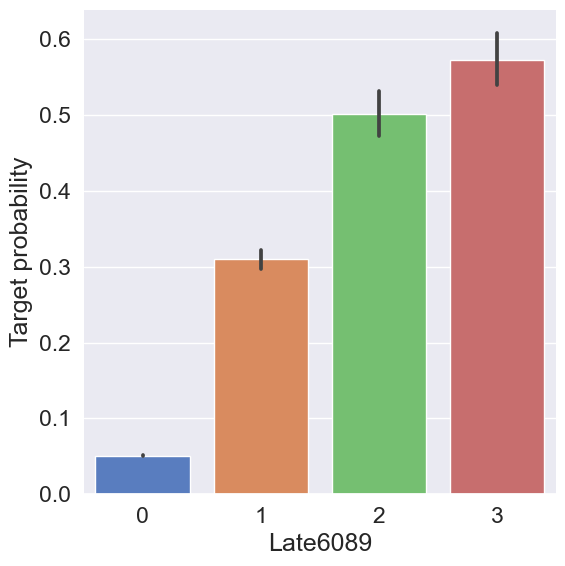

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
g = sns.catplot(
    x="Late6089", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Replaces the 'size' parameter in factorplot
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()


In [55]:
dataset.Deps.describe()

count    248877.00000
mean          0.76192
std           1.11501
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          43.00000
Name: Deps, dtype: float64

In [56]:
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())

In [57]:
dataset.Deps.isnull().sum()

0

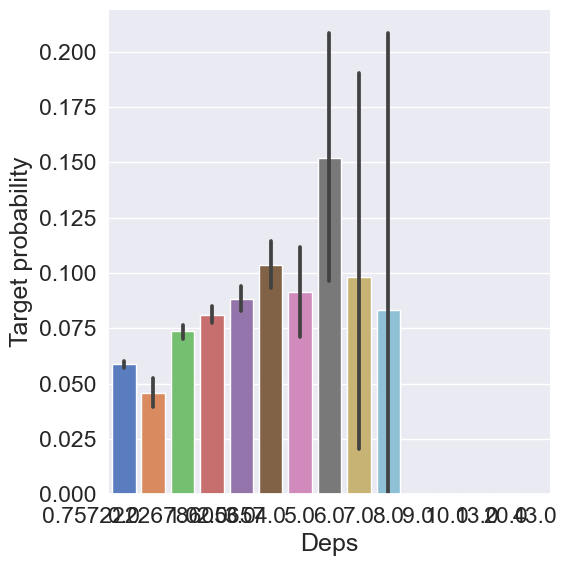

In [58]:
# Create the bar plot
g = sns.catplot(
    x="Deps", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Replaces the 'size' parameter in factorplot()
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [59]:
for i in range(len(dataset)):
    if dataset.Deps[i] >= 4:
        dataset.Deps[i] = 4

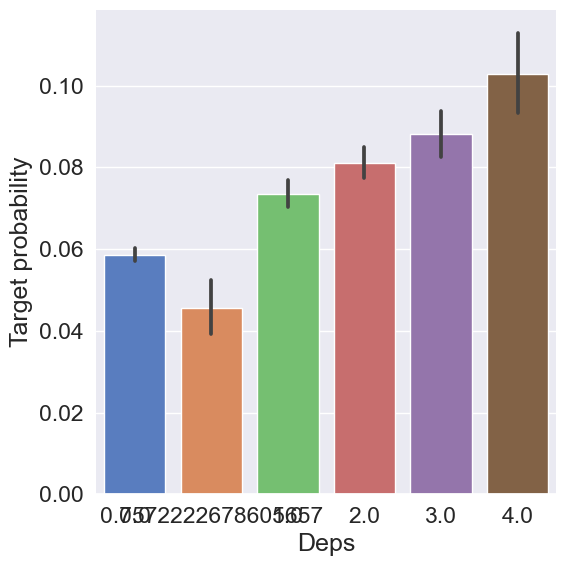

In [60]:
# Create the bar plot
g = sns.catplot(
    x="Deps", 
    y="Target", 
    data=dataset, 
    kind="bar", 
    height=6,  # Replaces the 'size' parameter from factorplot()
    palette="muted"
)

# Customize the plot
g.despine(left=True)
g.set_ylabels("Target probability")

# Show the plot
plt.show()

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Id             150000 non-null  float64
 1   Target         150000 non-null  float64
 2   UnsecLines     251503 non-null  int8   
 3   age            251503 non-null  int8   
 4   Late3059       251503 non-null  int64  
 5   DebtRatio      251503 non-null  int8   
 6   MonthlyIncome  251503 non-null  int8   
 7   OpenCredit     251503 non-null  int8   
 8   Late90         251503 non-null  int64  
 9   PropLines      251503 non-null  int64  
 10  Late6089       251503 non-null  int64  
 11  Deps           251503 non-null  float64
 12  Unknown        101503 non-null  float64
dtypes: float64(4), int64(4), int8(5)
memory usage: 16.5 MB


In [62]:
dataset.head()

,Id,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps,Unknown
0,1.0,1.0,4,1,2,3,4,4,0,6,0,2.0,NaN
1,2.0,0.0,4,1,0,0,0,0,0,0,0,1.0,NaN
2,3.0,0.0,3,0,1,0,0,0,1,0,0,0.0,NaN
3,4.0,0.0,2,0,0,0,0,1,0,0,0,0.0,NaN
4,5.0,0.0,4,2,1,0,4,2,0,1,0,0.0,NaN


In [63]:
dataset = pd.get_dummies(dataset, columns = ["UnsecLines"], prefix="UnsecLines")
dataset = pd.get_dummies(dataset, columns = ["age"], prefix="age")
dataset = pd.get_dummies(dataset, columns = ["Late3059"], prefix="Late3059")
dataset = pd.get_dummies(dataset, columns = ["DebtRatio"], prefix="DebtRatio")
dataset = pd.get_dummies(dataset, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
dataset = pd.get_dummies(dataset, columns = ["OpenCredit"], prefix="OpenCredit")
dataset = pd.get_dummies(dataset, columns = ["Late90"], prefix="Late90")
dataset = pd.get_dummies(dataset, columns = ["PropLines"], prefix="PropLines")
dataset = pd.get_dummies(dataset, columns = ["Late6089"], prefix="Late6089")
dataset = pd.get_dummies(dataset, columns = ["Deps"], prefix="Deps")

In [64]:
dataset.head()

,Id,Target,Unknown,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,age_3,age_4,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_0,DebtRatio_1,DebtRatio_2,DebtRatio_3,DebtRatio_4,MonthlyIncome_0,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,OpenCredit_0,OpenCredit_1,OpenCredit_2,OpenCredit_3,OpenCredit_4,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_0.7572222678605657,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1.0,1.0,NaN,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
1,2.0,0.0,NaN,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,3.0,0.0,NaN,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4.0,0.0,NaN,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,5.0,0.0,NaN,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [65]:
dataset.shape

(251503, 58)

In [66]:
train = dataset[:train_len]
Kaggle_test = dataset[train_len:]
Kaggle_test.drop(labels=["Target"],axis = 1,inplace=True)

In [67]:
Kaggle_test.shape

(101503, 57)

In [68]:
## Separate train features and label 

train["Target"] = train["Target"].astype(int)

Y_train = train["Target"]

X_train = train.drop(labels = ["Target", "Unknown"],axis = 1)

In [69]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, Y_train)


In [70]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<Axes: ylabel='feature'>

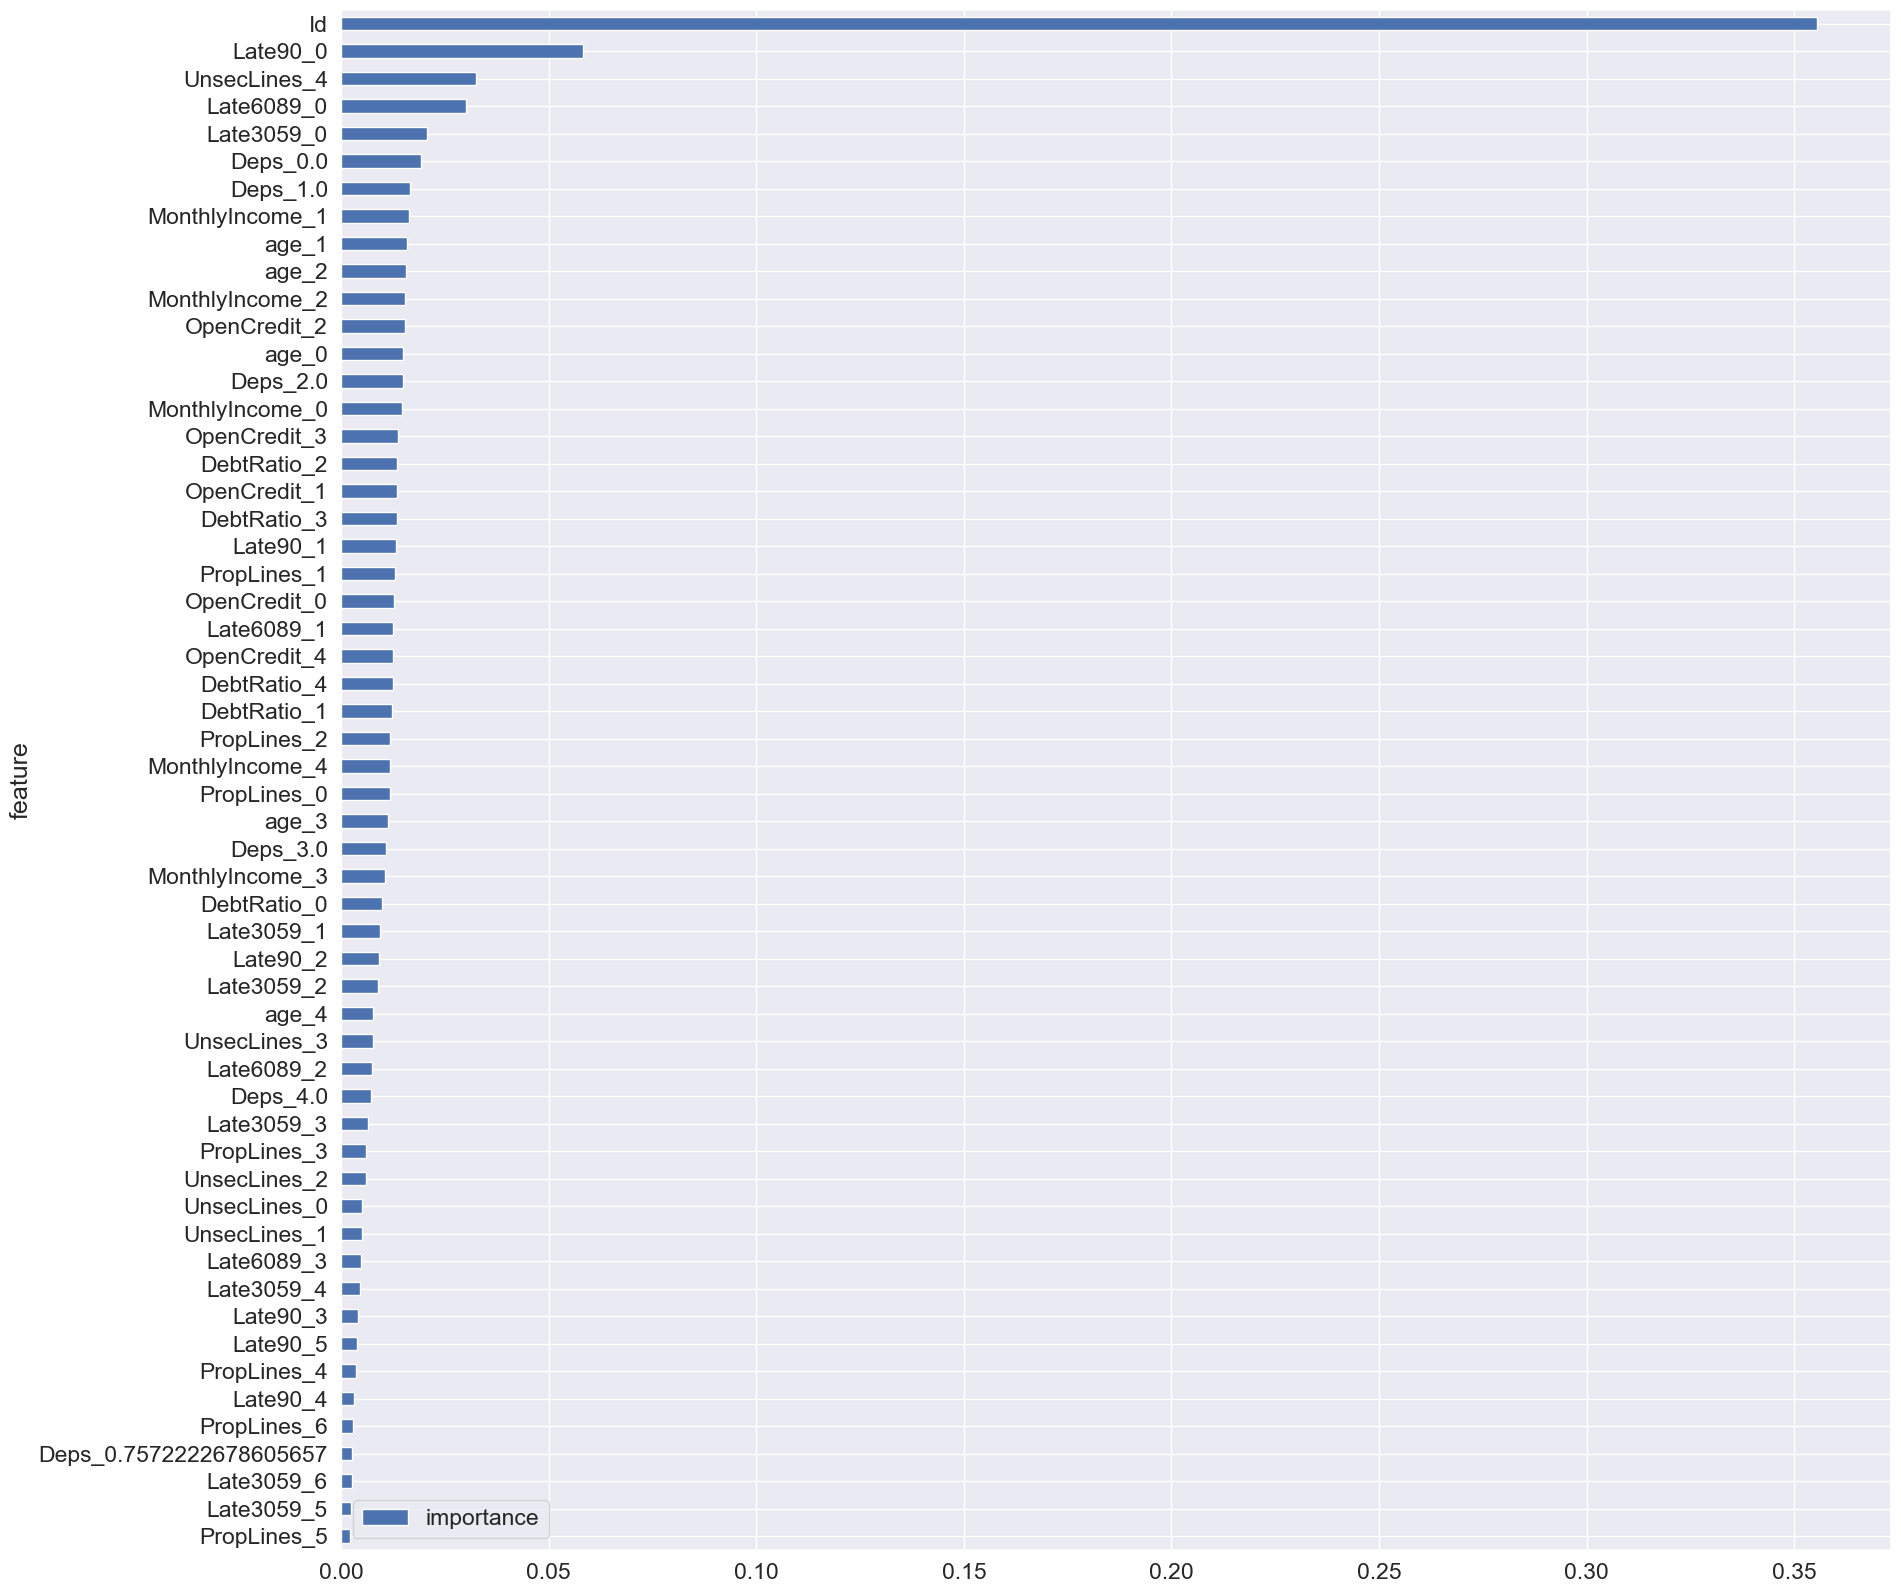

In [71]:
features.plot(kind='barh', figsize=(20, 20))

In [72]:
parameters = {'n_estimators': 1000, 'random_state' : 20}
    
model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=20)

In [73]:
Kaggle_test.head()

,Id,Unknown,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,age_3,age_4,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_0,DebtRatio_1,DebtRatio_2,DebtRatio_3,DebtRatio_4,MonthlyIncome_0,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,OpenCredit_0,OpenCredit_1,OpenCredit_2,OpenCredit_3,OpenCredit_4,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_0.7572222678605657,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
150000,NaN,1.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
150001,NaN,2.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
150002,NaN,3.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
150003,NaN,4.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
150004,NaN,5.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [75]:
results_df = pd.read_csv("D:\\cs-test.csv")

In [78]:
results_df.head()

,Unnamed: 0,SeriousDlqin2yrs
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
